## 3.3 Uses of the standard Normal distribution

Suppose we wanted to answer the following question: 

> What is the probability of having a 'healthy' weight?

A healthy weight is often is often measured using the Body Mass Index (BMI - although see [here](https://www.health.harvard.edu/blog/how-useful-is-the-body-mass-index-bmi-201603309339) and [here](https://www.bbc.co.uk/news/health-43895508) for a discussion on why this may be too simplistic a measure). An individual's BMI can be calculated using their height and weight, using the formula BMI $= \frac{mass(kg)}{height(m)^2}$. Then people can be classified as:

| Classification | BMI | 
|:-|:-|
| Underweight |<18.5 |
| Normal | 18.5-24.9 |
| Overweight | 25-29.9 |
| Obese | 30-39.9 |
| Extremely obese | >40 |

To address our question, we will use data taken from a study undertaken among a group of 76 cleaners, that investigated whether telling the cleaners they had an active lifestyle influenced their BMI. We will assume that values of BMI approximately follow a normal distribution. We do not know the true values of $\mu$ and $\sigma$ so we will replace these with the sample mean and standard deviation. This gives us values of $\mu=$26.5 and $\sigma^2=$ 18.1, as demonstrated in the snippet of code below.


In [1]:
# BMI dataset
dat <- read.csv("Practicals/Datasets/BMI/MindsetMatters.csv")
head(dat)
#remove observations with no BMI data
dat <- dat[!is.na(dat$BMI),]
#estimate mu and sigma
mu <- mean(dat$BMI)
print(paste0("value of mu is ",round(mu,2)))
sig <- sd(dat$BMI)
print(paste0("value of sigma is ",round(sig,2)))

Cond,Age,Wt,Wt2,BMI,BMI2,Fat,Fat2,WHR,WHR2,Syst,Syst2,Diast,Diast2
0,43,137,137.4,25.1,25.1,31.9,32.8,0.79,0.79,124,118,70,73
0,42,150,147.0,29.3,28.7,35.5,NA,0.81,0.81,119,112,80,68
0,41,124,124.8,26.9,27.0,35.1,NA,0.84,0.84,108,107,59,65
0,40,173,171.4,32.8,32.4,41.9,42.4,1.00,1.00,116,126,71,79
0,33,163,160.2,37.9,37.2,41.7,NA,0.86,0.84,113,114,73,78
0,24,90,91.8,16.5,16.8,NA,NA,0.73,0.73,NA,NA,78,76


[1] "value of mu is 26.46"


[1] "value of sigma is 4.25"


So what is the probability a randomly selected person in this sample has a normal BMI? 

#### Approach 1: Manual calculation
One option is to make use of pre-calculated probabilities of the standard normal distribution. If we write $X$ to represent the value of a person's BMI, then we are assuming that

$$
X \sim N(\mu=26.5, \sigma^2=18.1)
$$

To make use of the pre-calculated probabilities for the standard normal distribution, we must first transform our normally distributed variable to have a standard normal distribution. We know that the transformed variable $Z$ (the *Z score*) has a standard normal distribution, where

$$
Z = \frac{X - \mu}{\sigma}
$$

Given values for $\mu$ and $\sigma$ we can go from the *X scale* to the *Z scale* and *vice versa*. The important point about describing a distribution on the Z scale is that this opens the ability to calculate specific probabilities. So back to answering the question...

From the table above we can see that a normal weight is classified as a BMI between 18.5 and 24.9, and we want to know what the probability is that a randomly selected person falls between these limits. We write this as;

$$
P(18.5 < X < 24.9) 
$$

On the Z-scale, this is equivalent to saying that:

$$
P(-1.87 < Z < -0.37) = P(Z < -0.37) - P(Z < -1.87)
$$

Tables exist containing a range of pre-calculated probabilities that a variable following a standard normal distribution takes a value of less than $k$, for a range of possible values of $k$. These are often called *z-tables* (found [online](http://www.z-table.com/) or at the back of most stats books). From these tables, we can look up the corresponding probability for each z-score, giving:

$$
0.3557 - 0.0307 = 0.325
$$

#### Approach 2: Using R to do the same calculation

Using this approach, R is ultimately using the same pre-calculated probability tables. However, it is considerably quicker and easier to ask R to look up the values rather than finding them in tables.

In [2]:
# a) if we were to use Z tables within R (to illustrate the point)

z_min <- (18.5-mu)/sig
z_max <- (24.9-mu)/sig

# note when using pnorm we don't need to specify mu and sigma as the 
# function assumes mu=0 and sigma=1 unless specified.
print(paste0("z_max is ",round(z_max,2)," and z_min is ",round(z_min,2)))
print(paste0("Probability of having a healthy BMI is (z-score) ",round(pnorm(z_max)-pnorm(z_min),3)))

[1] "z_max is -0.37 and z_min is -1.87"


[1] "Probability of having a healthy BMI is (z-score) 0.326"


#### Approach 3: Using R to do the  calculation on the untransformed scale

In [3]:
# b) if we were to directly estimate
 
print(paste0("Probability of having a healthy BMI is (direct) ",round(pnorm(24.9,mu,sig)-pnorm(18.5,mu,sig),3)))

[1] "Probability of having a healthy BMI is (direct) 0.326"


Calculating directly gives the same result as using a z-score in R, and this returns the same information as using z-tables.

In answer to our question, we estimate that the probability of having a 'healthy' weight is 32.6\%. We can compare this to the observed proportion of our sample of data with a 'healthy' BMI.

[1] "Within the data a healthy BMI is seen 35.1%"


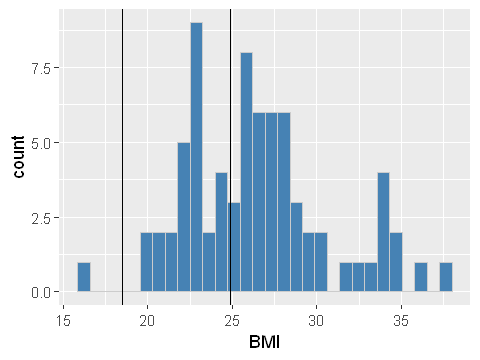

In [4]:
# c) provide a sanity check against the data
options(repr.plot.width=4, repr.plot.height=3)
library(ggplot2)

ggplot(dat,aes(x=BMI)) + geom_histogram(bins = 30,fill="steelblue",col="grey80") +
    geom_vline(xintercept = c(18.5,24.9))
#hist(dat$BMI,col="steelblue")
#abline(v=c(18.5,24.9),lty=2)
print(paste0("Within the data a healthy BMI is seen ",
             round(100*((sum(dat$BMI<24.9)-sum(dat$BMI<18.5))/length(dat$BMI)),1),"%"))

So we can see that the sample estimate (35.1%) is roughly similar to the population estimate of 32.6%. 